In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import koreanize_matplotlib 

data = pd.read_table('mini.csv',sep=',')
data

,user_id,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,preferred_difficulty_level,subscription_type,customer_inquiry_history,payment_pattern,target
0,b919c29d,13,14,14.946163,8.427187,18,16,68.360455,3,4,Low,Basic,4,5,0
1,a0a60abb,16,18,18.453224,72.646087,16,13,97.567322,2,3,Medium,Basic,1,6,1
2,b9f171ae,22,1,16.195228,21.774492,13,14,94.358763,3,4,Medium,Premium,0,7,1
3,5dc0ba8b,1,19,17.628656,42.659066,19,18,70.153228,0,3,Low,Basic,1,0,1
4,65c83654,4,5,21.390656,30.744287,19,10,81.917908,2,4,Medium,Basic,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,ae6b76bc,22,29,14.727623,84.053558,18,16,64.966803,2,5,Low,Premium,1,1,1
9996,24588752,10,11,19.374054,45.464833,9,8,82.750244,3,3,Medium,Basic,2,7,1
9997,e4622a54,7,27,18.240978,127.302411,24,14,81.567839,3,5,High,Basic,1,6,1
9998,e07fbad9,11,7,18.783800,5.297234,10,10,89.885656,4,5,Low,Basic,2,0,1


In [2]:
data_CV_target = data[['customer_inquiry_history', 'target']]
data_CV_target

,customer_inquiry_history,target
0,4,0
1,1,1
2,0,1
3,1,1
4,3,1
...,...,...
9995,1,1
9996,2,1
9997,1,1
9998,2,1


In [3]:
counts = data_CV_target.groupby('customer_inquiry_history')['target'].value_counts().unstack(fill_value=0)
counts

target,0,1
customer_inquiry_history,,
0,500,876
1,1051,1617
2,990,1655
3,701,1150
4,364,553
5,140,245
6,41,76
7,10,21
8,3,6


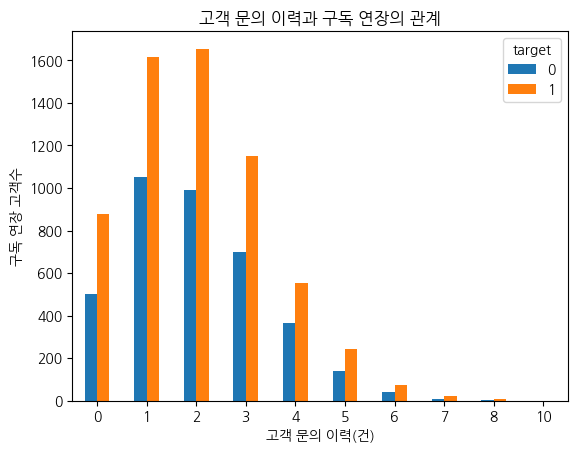

In [14]:
counts.plot(kind='bar', rot=0)
plt.title('고객 문의 이력과 구독 연장의 관계')
plt.xlabel('고객 문의 이력(건)')
plt.ylabel('구독 연장 고객수')

plt.show()

In [5]:
data_sub_target = data[['subscription_duration', 'target']]
data_sub_target

,subscription_duration,target
0,13,0
1,16,1
2,22,1
3,1,1
4,4,1
...,...,...
9995,22,1
9996,10,1
9997,7,1
9998,11,1


In [6]:
sub_counts = data_sub_target.groupby('subscription_duration')['target'].value_counts().unstack(fill_value=0)
sub_counts

target,0,1
subscription_duration,,
1,172,264
2,159,284
3,128,280
4,181,294
5,169,255
6,195,276
7,158,274
8,183,255
9,172,268


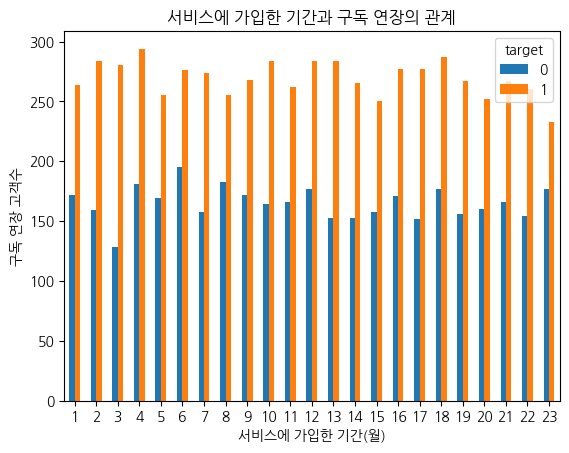

In [11]:
sub_counts.plot(kind='bar', rot=0)
plt.title('서비스에 가입한 기간과 구독 연장의 관계')
plt.xlabel('서비스에 가입한 기간(월)')
plt.ylabel('구독 연장 고객수')


plt.show()

In [24]:
df_freq = data[['average_time_per_learning_session', 'monthly_active_learning_days', 'community_engagement_level', 'total_completed_courses', 'recent_learning_achievement']]
df_freq

,average_time_per_learning_session,monthly_active_learning_days,community_engagement_level,total_completed_courses,recent_learning_achievement
0,8.427187,18,4,16,68.360455
1,72.646087,16,3,13,97.567322
2,21.774492,13,4,14,94.358763
3,42.659066,19,3,18,70.153228
4,30.744287,19,4,10,81.917908
...,...,...,...,...,...
9995,84.053558,18,5,16,64.966803
9996,45.464833,9,3,8,82.750244
9997,127.302411,24,5,14,81.567839
9998,5.297234,10,5,10,89.885656


In [27]:
corr = df_freq.corr()
new_index = {'average_time_per_learning_session': '각 학습 세션에 소요된 평균 시간', 'monthly_active_learning_days': '활동적인 학습 일수(월)', 'community_engagement_level': '커뮤니티 활동지수', 'total_completed_courses': '완료한 총 코스 수', 'recent_learning_achievement': '최근 학습 성취도'}
new_columns = {'average_time_per_learning_session': '각 학습 세션에 소요된 평균 시간', 'monthly_active_learning_days': '활동적인 학습 일수(월)', 'community_engagement_level': '커뮤니티 활동지수', 'total_completed_courses': '완료한 총 코스 수', 'recent_learning_achievement': '최근 학습 성취도'}
corr = corr.rename(columns=new_columns, index=new_index)
corr

,각 학습 세션에 소요된 평균 시간,활동적인 학습 일수(월),커뮤니티 활동지수,완료한 총 코스 수,최근 학습 성취도
각 학습 세션에 소요된 평균 시간,1.000000,-0.001678,0.086485,0.081332,-0.008231
활동적인 학습 일수(월),-0.001678,1.000000,0.000700,0.004816,0.030110
커뮤니티 활동지수,0.086485,0.000700,1.000000,0.266026,-0.000810
완료한 총 코스 수,0.081332,0.004816,0.266026,1.000000,-0.002416
최근 학습 성취도,-0.008231,0.030110,-0.000810,-0.002416,1.000000


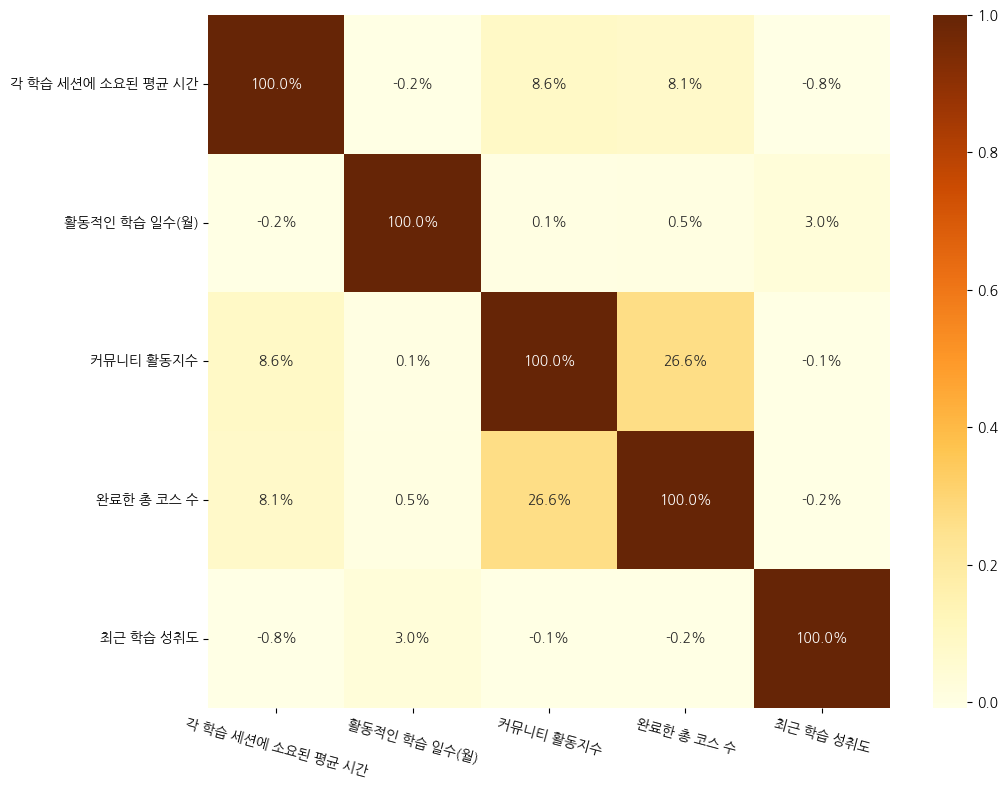

In [36]:
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

plt.figure(figsize=(11, 9))
sns.heatmap(corr, annot=True, fmt=".1%", cmap='YlOrBr')
plt.xticks(rotation= -15)
plt.yticks(rotation= 0)
plt.show()

In [39]:
data_avg = data[['average_time_per_learning_session', 'target']]
data_avg

,average_time_per_learning_session,target
0,8.427187,0
1,72.646087,1
2,21.774492,1
3,42.659066,1
4,30.744287,1
...,...,...
9995,84.053558,1
9996,45.464833,1
9997,127.302411,1
9998,5.297234,1


In [40]:
data_avg.describe()

,average_time_per_learning_session,target
count,10000.000000,10000.000000
mean,54.917720,0.619900
std,56.024310,0.485435
min,0.011515,0.000000
25%,15.276611,0.000000
50%,37.578818,1.000000
75%,75.584200,1.000000
max,503.372616,1.000000


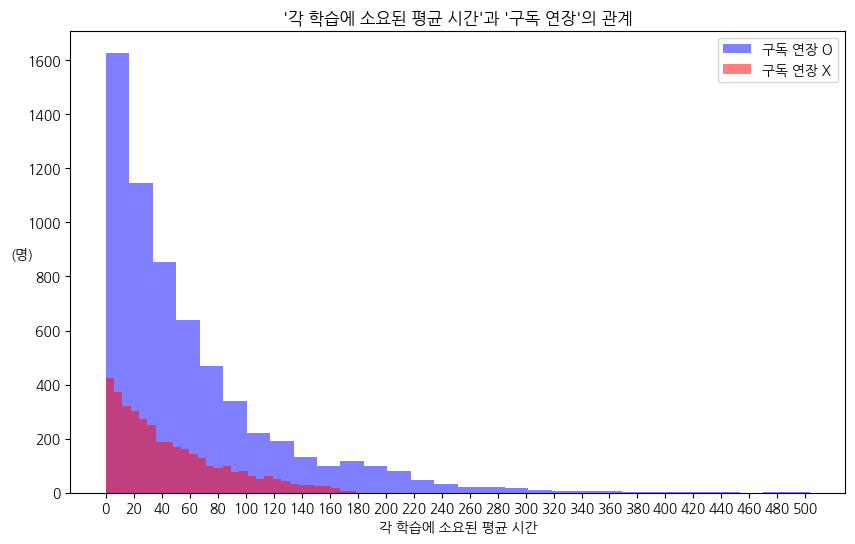

In [58]:
target_1 = data_avg[data_avg['target'] == 1]['average_time_per_learning_session']
target_0 = data_avg[data_avg['target'] == 0]['average_time_per_learning_session']

plt.figure(figsize=(10, 6))
plt.hist(target_1, bins=30, alpha=0.5, color='blue', label='구독 연장 O')
plt.hist(target_0, bins=30, alpha=0.5, color='red', label='구독 연장 X')
plt.xlabel('각 학습에 소요된 평균 시간')
plt.ylabel('(명)')
plt.title("'각 학습에 소요된 평균 시간'과 '구독 연장'의 관계")
plt.xticks(np.arange(0, 501, 20))
plt.ylabel('(명)', rotation= 0)

plt.legend()
plt.show()

In [59]:
data_act = data[['monthly_active_learning_days', 'target']]
data_act

,monthly_active_learning_days,target
0,18,0
1,16,1
2,13,1
3,19,1
4,19,1
...,...,...
9995,18,1
9996,9,1
9997,24,1
9998,10,1


<Figure size 1000x600 with 0 Axes>

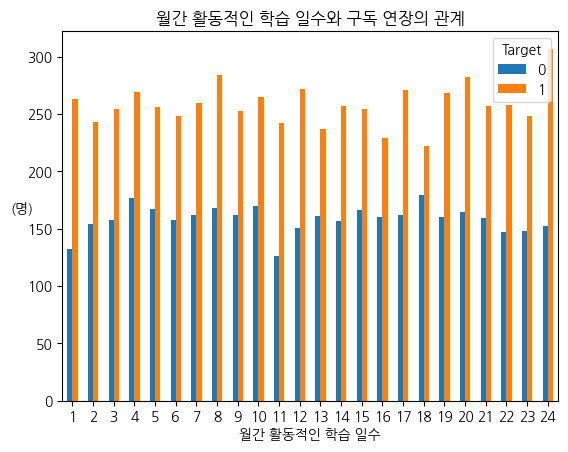

In [67]:
x = data_act['monthly_active_learning_days']
y = data_act['target']

count_target_by_days = data_act.groupby('monthly_active_learning_days')['target'].value_counts().unstack().fillna(0)

plt.figure(figsize=(10, 6))
count_target_by_days.plot(kind='bar', rot=0)
plt.xlabel('월간 활동적인 학습 일수')
plt.ylabel('(명)')
plt.ylabel('(명)', rotation= 0)
plt.title('월간 활동적인 학습 일수와 구독 연장의 관계')
plt.legend(title='Target', labels=['0', '1'], loc='upper right')
plt.show()

In [69]:
data_com = data[['community_engagement_level', 'target']]
data_com

,community_engagement_level,target
0,4,0
1,3,1
2,4,1
3,3,1
4,4,1
...,...,...
9995,5,1
9996,3,1
9997,5,1
9998,5,1


In [70]:
com_counts = data_com.groupby('community_engagement_level')['target'].value_counts().unstack(fill_value=0)
com_counts

target,0,1
community_engagement_level,,
1,211,348
2,468,751
3,620,968
4,805,1265
5,1697,2867


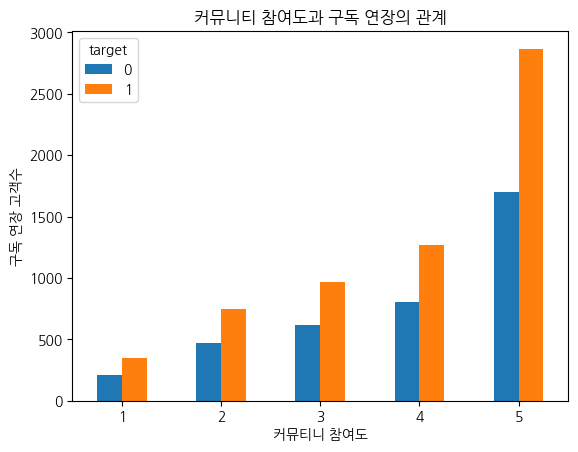

In [71]:
com_counts.plot(kind='bar', rot=0)
plt.title('커뮤니티 참여도과 구독 연장의 관계')
plt.xlabel('커뮤티니 참여도')
plt.ylabel('구독 연장 고객수')

plt.show()

In [73]:
df_corr = data[['total_completed_courses', 'recent_learning_achievement', 'preferred_difficulty_level']]
df_corr

,total_completed_courses,recent_learning_achievement,preferred_difficulty_level
0,16,68.360455,Low
1,13,97.567322,Medium
2,14,94.358763,Medium
3,18,70.153228,Low
4,10,81.917908,Medium
...,...,...,...
9995,16,64.966803,Low
9996,8,82.750244,Medium
9997,14,81.567839,High
9998,10,89.885656,Low


In [78]:
# 선호하는 레벨의 데이터를 숫자로 변경 (상관관계를 분석하기 위함)
df_corr.loc[:, 'preferred_difficulty_level'] = df_corr['preferred_difficulty_level'].replace({'Low': 3, 'Medium': 5, 'High': 10})
df_corr

,total_completed_courses,recent_learning_achievement,preferred_difficulty_level
0,16,68.360455,3
1,13,97.567322,5
2,14,94.358763,5
3,18,70.153228,3
4,10,81.917908,5
...,...,...,...
9995,16,64.966803,3
9996,8,82.750244,5
9997,14,81.567839,10
9998,10,89.885656,3


In [79]:
corr2 = df_corr.corr()
corr2

,total_completed_courses,recent_learning_achievement,preferred_difficulty_level
total_completed_courses,1.000000,-0.002416,-0.215116
recent_learning_achievement,-0.002416,1.000000,-0.001156
preferred_difficulty_level,-0.215116,-0.001156,1.000000


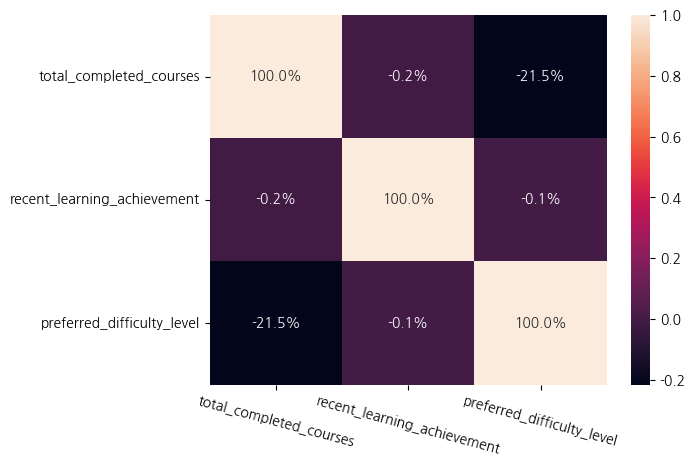

In [82]:
sns.heatmap(corr2, annot=True, fmt=".1%")
plt.xticks(rotation= -15)
plt.yticks(rotation= 0)
plt.show()

In [84]:
data_ach = data[['total_completed_courses', 'target']]
data_ach

,total_completed_courses,target
0,16,0
1,13,1
2,14,1
3,18,1
4,10,1
...,...,...
9995,16,1
9996,8,1
9997,14,1
9998,10,1


In [85]:
data_ach.describe()

,total_completed_courses,target
count,10000.000000,10000.000000
mean,12.227500,0.619900
std,3.634125,0.485435
min,1.000000,0.000000
25%,10.000000,0.000000
50%,12.000000,1.000000
75%,15.000000,1.000000
max,27.000000,1.000000


In [86]:
ach_count = data_ach.groupby('total_completed_courses')['target'].value_counts().unstack(fill_value=0)
ach_count

target,0,1
total_completed_courses,,
1,1,0
2,3,7
3,8,15
4,16,44
5,49,106
6,95,143
7,183,259
8,231,368
9,304,502


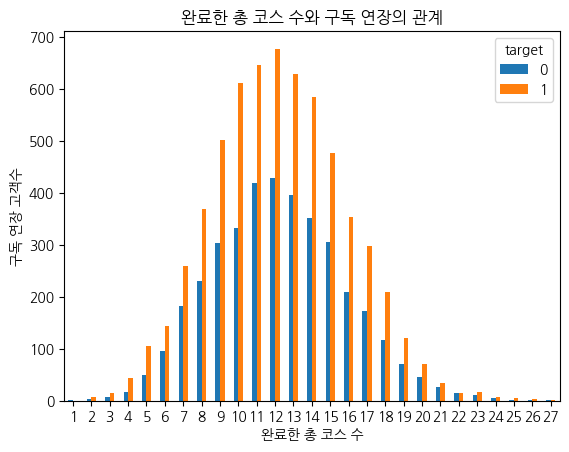

In [88]:
ach_count.plot(kind='bar', rot=0)
plt.title('완료한 총 코스 수와 구독 연장의 관계')
plt.xlabel('완료한 총 코스 수')
plt.ylabel('구독 연장 고객수')

plt.show()

In [93]:
data_pat = data[['payment_pattern', 'target']]
data_pat

,payment_pattern,target
0,5,0
1,6,1
2,7,1
3,0,1
4,0,1
...,...,...
9995,1,1
9996,7,1
9997,6,1
9998,0,1


In [94]:
pat_count = data_pat.groupby('payment_pattern')['target'].value_counts().unstack(fill_value=0)
pat_count

target,0,1
payment_pattern,,
0,468,807
1,502,783
2,459,747
3,467,763
4,461,753
5,488,750
6,467,801
7,489,795


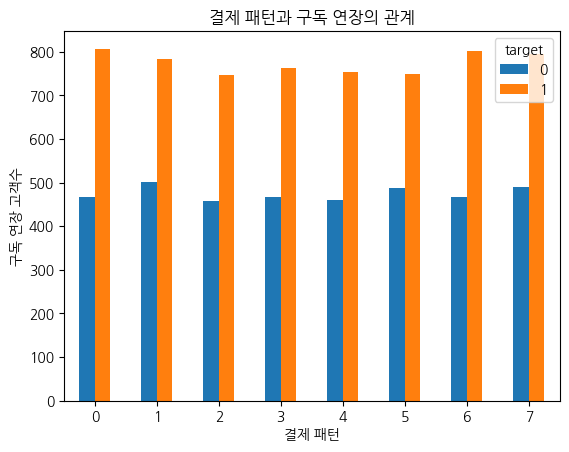

In [95]:
pat_count.plot(kind='bar', rot=0)
plt.title('결제 패턴과 구독 연장의 관계')
plt.xlabel('결제 패턴')
plt.ylabel('구독 연장 고객수')

plt.show()